In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
os.getcwd()# to get current working dir
#pd.set_option("display.max_columns",None)

In [3]:
data=pd.read_csv("crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.shape 

(2200, 8)

In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data[data.duplicated()].sum()

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [9]:
data["ph"]=data["ph"].astype("int64")
data["temperature"]=data["temperature"].astype("int64")
data["humidity"]=data["humidity"].astype("int64")
data["rainfall"]=data["rainfall"].astype("int64")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   N            2200 non-null   int64 
 1   P            2200 non-null   int64 
 2   K            2200 non-null   int64 
 3   temperature  2200 non-null   int64 
 4   humidity     2200 non-null   int64 
 5   ph           2200 non-null   int64 
 6   rainfall     2200 non-null   int64 
 7   label        2200 non-null   object
dtypes: int64(7), object(1)
memory usage: 137.6+ KB


In [11]:
data.describe() #stats measureents of data

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.120000,70.976364,5.950000,102.970000
std,36.917334,32.985883,50.647931,5.062696,22.263427,0.824395,54.948949
min,0.000000,5.000000,5.000000,8.000000,14.000000,3.000000,20.000000
25%,21.000000,28.000000,20.000000,22.000000,60.000000,5.000000,64.000000
50%,37.000000,51.000000,32.000000,25.000000,80.000000,6.000000,94.000000
75%,84.250000,68.000000,49.000000,28.000000,89.000000,6.000000,124.000000
max,140.000000,145.000000,205.000000,43.000000,99.000000,9.000000,298.000000


In [12]:
data["label"].value_counts()

apple          100
orange         100
rice           100
pomegranate    100
jute           100
muskmelon      100
pigeonpeas     100
watermelon     100
banana         100
blackgram      100
mungbean       100
mothbeans      100
lentil         100
grapes         100
maize          100
chickpea       100
kidneybeans    100
coconut        100
mango          100
papaya         100
cotton         100
coffee         100
Name: label, dtype: int64

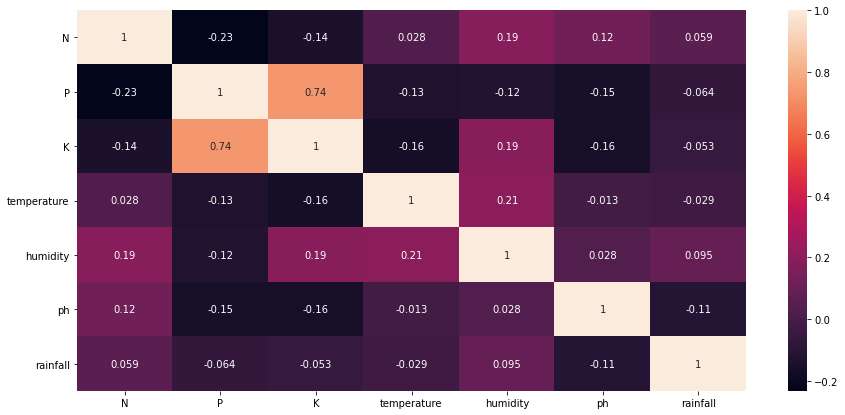

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()


C:\Users\Bhuma\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


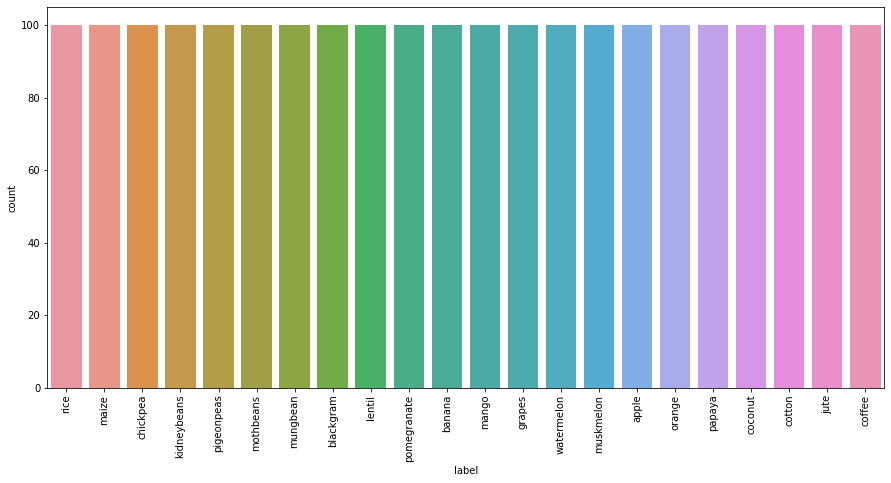

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(data["label"])
plt.xticks(rotation=90)
plt.show()


C:\Users\Bhuma\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


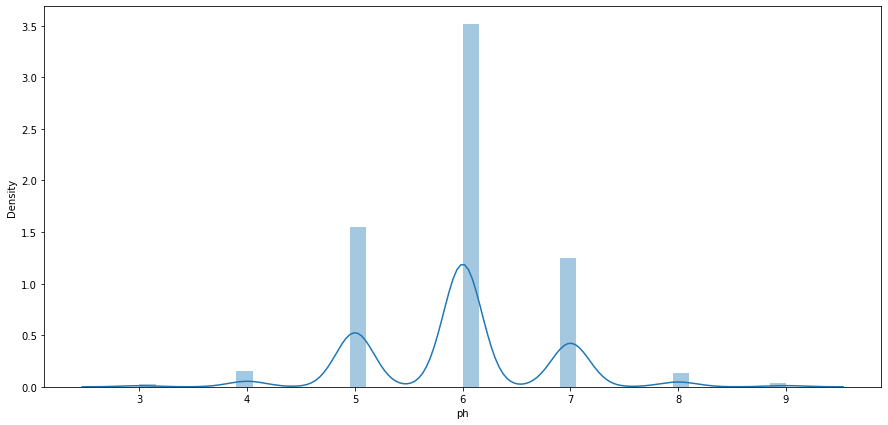

In [15]:
plt.figure(figsize=(15,7))
sns.distplot(data["ph"])
plt.show()

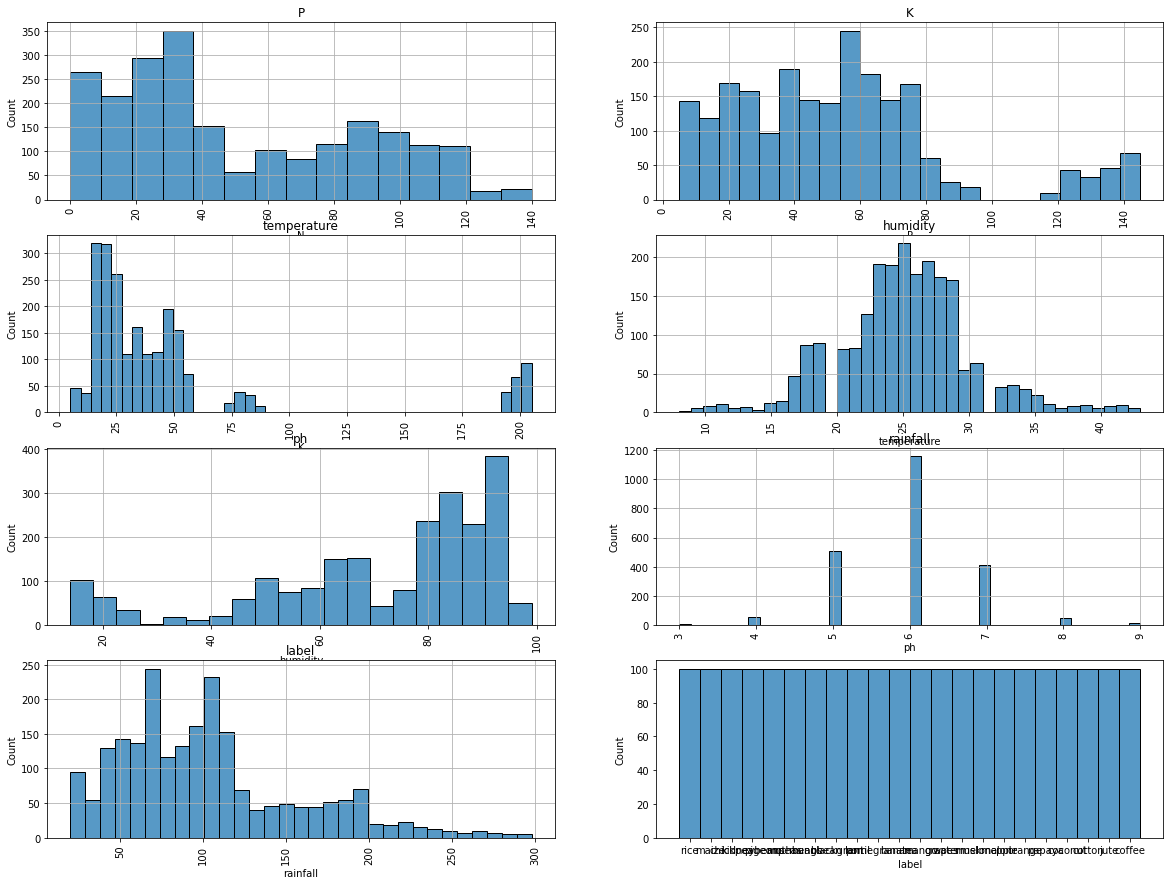

In [49]:
col=data.columns
plt.figure(figsize=(20,15))
for i,c in enumerate(data.columns):
    plt.title(c)
    plt.grid()
    plt.xticks(rotation=90)
    plt.subplot(4,2,i+1)
    sns.histplot(data[c])

In [17]:
input=data.drop("label",axis=1)
output=data["label"]

In [18]:
sc=StandardScaler()
input_sc=sc.fit_transform(input)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(input_sc,output,test_size=0.2,random_state=2,stratify=output)

In [20]:
x_train.shape

(1760, 7)

In [21]:
x_test.shape

(440, 7)

In [22]:
y_train.shape

(1760,)

In [23]:
y_test.shape

(440,)

# LOGISTIC REGRESSION MODEL

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\Bhuma\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
test_pred=log_model.predict(x_test)
test_pred

array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'rice',
       'muskmelon', 'mango', 'cotton', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'jute', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'mothbeans', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon',

In [27]:
trainl_pred=log_model.predict(x_train)
trainl_pred

array(['muskmelon', 'cotton', 'mothbeans', ..., 'mango', 'mango',
       'orange'], dtype=object)

In [28]:
y_train

1432    muskmelon
1978       cotton
504     mothbeans
1459    muskmelon
843        lentil
          ...    
682      mungbean
223      chickpea
1114        mango
1155        mango
1687       orange
Name: label, Length: 1760, dtype: object

In [29]:
accuracy_score(y_train,trainl_pred)

0.9761363636363637

In [30]:
log_model_training_accuracy_score=accuracy_score(y_train,trainl_pred)

cm=confusion_matrix(y_train,trainl_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,trainl_pred))
print("classification_report:",classification_report(y_train,trainl_pred))
print("confusion_matrix:",cm)

TRAINING DATA SCORES
accuracy_score: 0.9761363636363637
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       0.94      0.96      0.95        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       0.99      1.00      0.99        80
      cotton       0.99      0.97      0.98        80
      grapes       1.00      1.00      1.00        80
        jute       0.88      0.91      0.90        80
 kidneybeans       0.96      0.99      0.98        80
      lentil       0.96      0.97      0.97        80
       maize       0.98      0.99      0.98        80
       mango       0.99      1.00      0.99        80
   mothbeans       0.99      0.94      0.96        80
    mungbean       0.99      1.00      0.99        80
   muskmelon       1.00      1.00      1.00        80
  

In [31]:
#plt.matshow(confusion_matrix,cmap="gray")

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA'}>

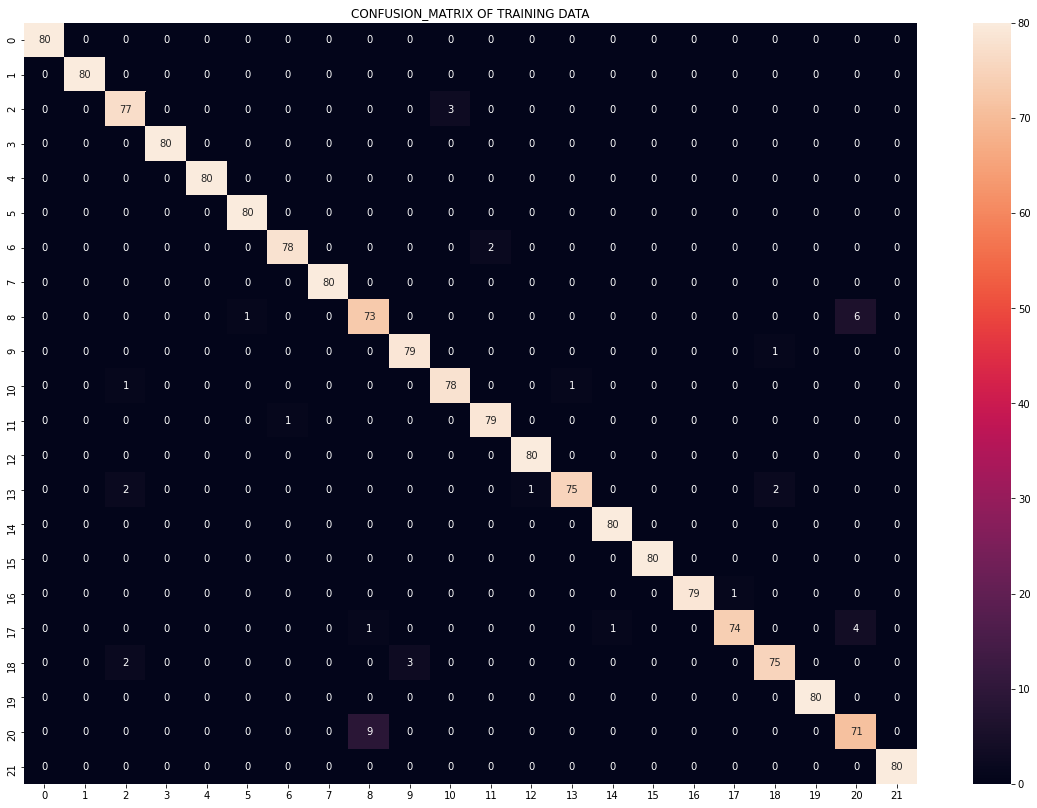

In [32]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF LOG MODEL")
sns.heatmap(cm,annot=True)

In [33]:
testl_pred=log_model.predict(x_test)
testl_pred

array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'rice',
       'muskmelon', 'mango', 'cotton', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'jute', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'mothbeans', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon',

In [35]:
log_model_testing_accuracy_score=accuracy_score(y_test,testl_pred)
cm1=confusion_matrix(y_test,testl_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",log_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cm1)

TESTING DATA SCORES
accuracy_score: 0.9727272727272728
classification_report: <function classification_report at 0x000001A714678280>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA'}>

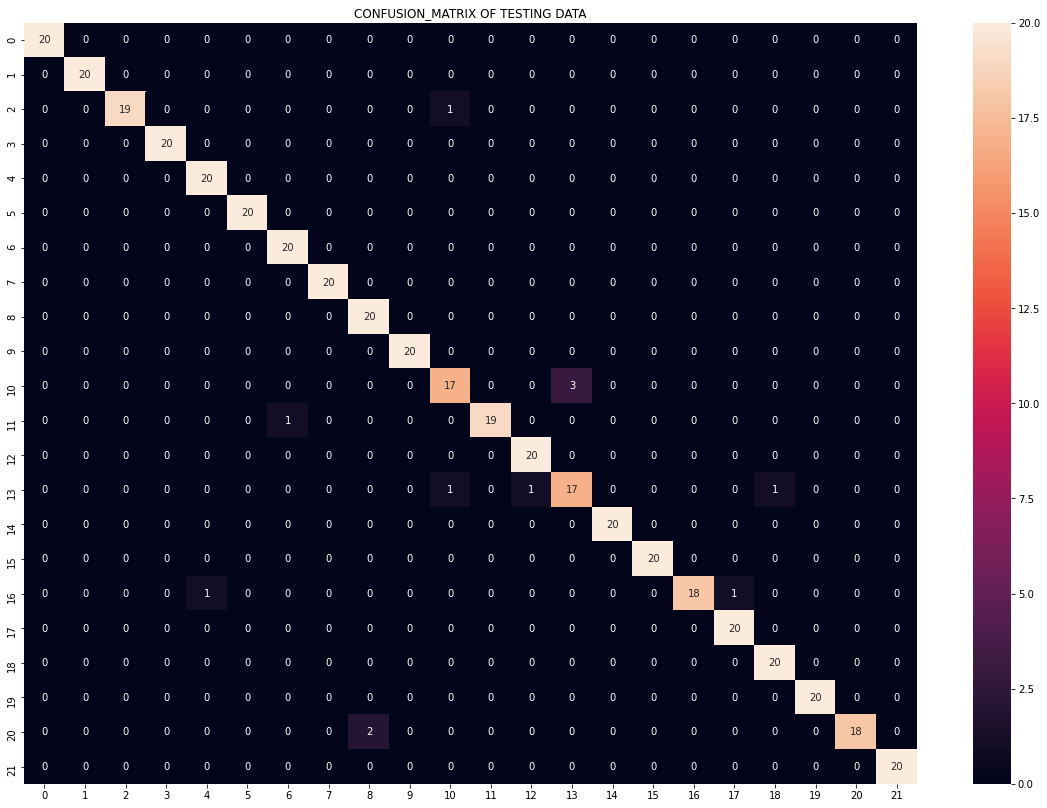

In [36]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF LOG MODEL")
sns.heatmap(cm1,annot=True)

# KNN model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knc_model=KNeighborsClassifier(n_neighbors=10)

In [39]:
knc_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
traink_pred=knc_model.predict(x_train)
traink_pred

array(['muskmelon', 'cotton', 'mothbeans', ..., 'mango', 'mango',
       'orange'], dtype=object)

In [43]:
testk_pred=knc_model.predict(x_test)
testk_pred

array(['watermelon', 'jute', 'banana', 'banana', 'banana', 'rice',
       'muskmelon', 'mango', 'cotton', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'jute', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'blackgram', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon',

In [44]:
knc_model_training_accuracy_score=accuracy_score(y_train,traink_pred)

cmk=confusion_matrix(y_train,traink_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,traink_pred))
print("classification_report:",classification_report(y_train,traink_pred))
print("confusion_matrix:",cmk)

TRAINING DATA SCORES
accuracy_score: 0.9727272727272728
classification_report:               precision    recall  f1-score   support

       apple       0.99      1.00      0.99        80
      banana       1.00      1.00      1.00        80
   blackgram       0.90      0.97      0.93        80
    chickpea       1.00      1.00      1.00        80
     coconut       0.99      1.00      0.99        80
      coffee       1.00      0.99      0.99        80
      cotton       0.97      0.97      0.97        80
      grapes       1.00      0.99      0.99        80
        jute       0.88      1.00      0.94        80
 kidneybeans       0.94      1.00      0.97        80
      lentil       0.92      0.95      0.93        80
       maize       0.97      0.97      0.97        80
       mango       0.96      1.00      0.98        80
   mothbeans       0.99      0.88      0.93        80
    mungbean       0.99      1.00      0.99        80
   muskmelon       1.00      1.00      1.00        80
  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF KNC MODEL'}>

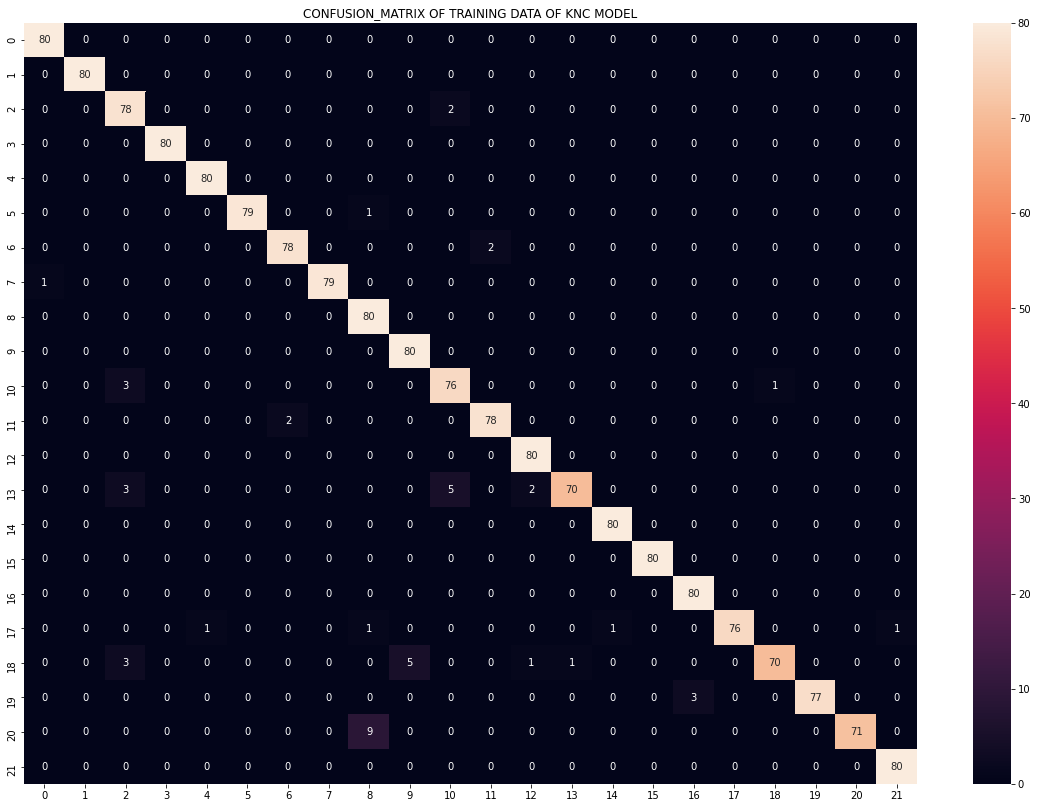

In [45]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF KNC MODEL")
sns.heatmap(cmk,annot=True)

In [46]:
knc_model_testing_accuracy_score=accuracy_score(y_test,testk_pred)
cmkt=confusion_matrix(y_test,testk_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",knc_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cmkt)

TESTING DATA SCORES
accuracy_score: 0.9681818181818181
classification_report: <function classification_report at 0x000001A714678280>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF KNC MODEL'}>

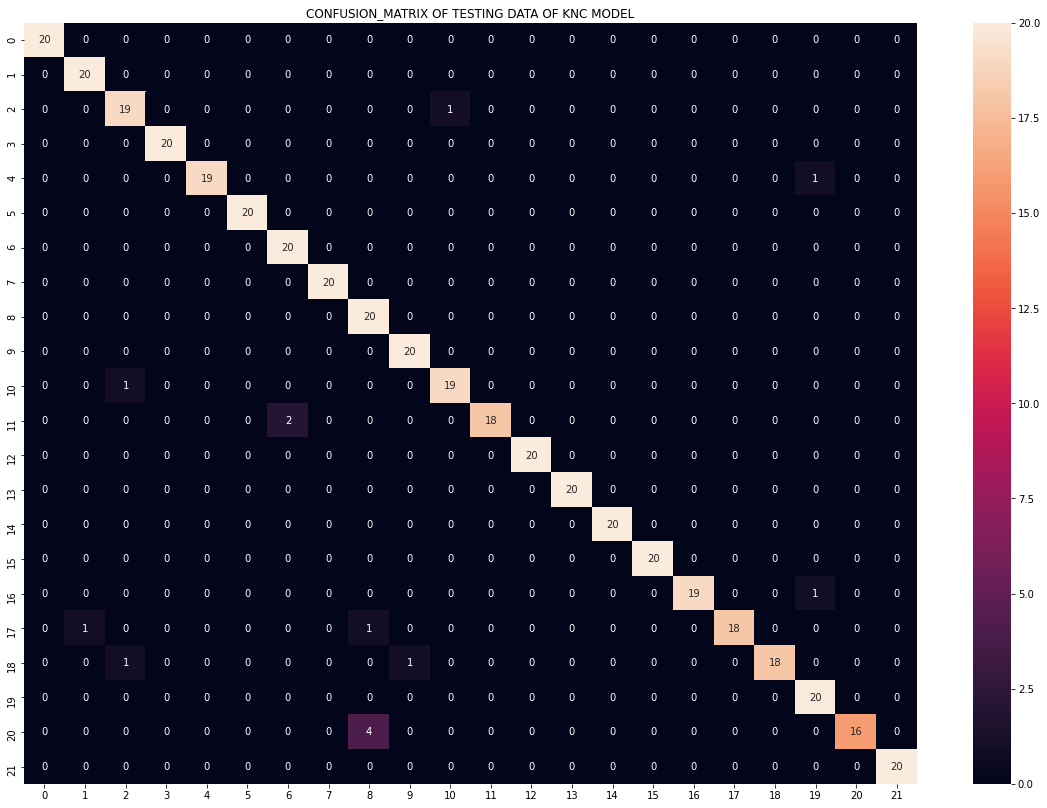

In [47]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF KNC MODEL")
sns.heatmap(cmkt,annot=True)

# NAIVE BAYES MODEL

In [50]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()

In [51]:
naive_model.fit(x_train,y_train)

GaussianNB()

In [52]:
trainn_pred=naive_model.predict(x_train)
trainn_pred

array(['muskmelon', 'cotton', 'mothbeans', ..., 'mango', 'mango',
       'orange'], dtype='<U11')

In [54]:
testn_pred=naive_model.predict(x_test)
testn_pred

array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'rice',
       'muskmelon', 'mango', 'maize', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'rice', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'lentil', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon', 'ma

In [55]:
naive_model_training_accuracy_score=accuracy_score(y_train,trainn_pred)

cmn=confusion_matrix(y_train,trainn_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,trainn_pred))
print("classification_report:",classification_report(y_train,trainn_pred))
print("confusion_matrix:",cmn)

TRAINING DATA SCORES
accuracy_score: 0.9954545454545455
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       1.00      1.00      1.00        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       1.00      1.00      1.00        80
      cotton       0.98      1.00      0.99        80
      grapes       1.00      1.00      1.00        80
        jute       0.94      0.99      0.96        80
 kidneybeans       1.00      1.00      1.00        80
      lentil       1.00      1.00      1.00        80
       maize       1.00      0.97      0.99        80
       mango       1.00      1.00      1.00        80
   mothbeans       1.00      1.00      1.00        80
    mungbean       1.00      1.00      1.00        80
   muskmelon       1.00      1.00      1.00        80
  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF NAIVE MODEL'}>

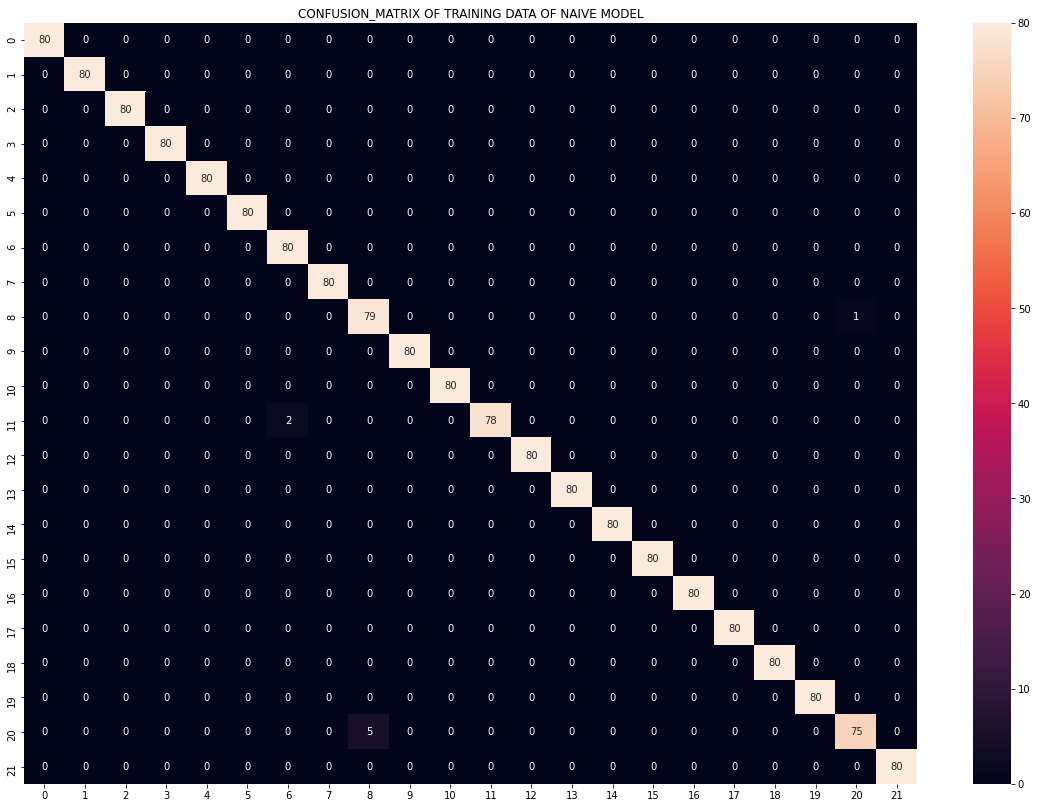

In [56]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF NAIVE MODEL")
sns.heatmap(cmn,annot=True)

In [57]:
naive_model_testing_accuracy_score=accuracy_score(y_test,testn_pred)
cmnt=confusion_matrix(y_test,testn_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",naive_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cmnt)

TESTING DATA SCORES
accuracy_score: 0.9954545454545455
classification_report: <function classification_report at 0x000001A714678280>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF NAIVE MODEL'}>

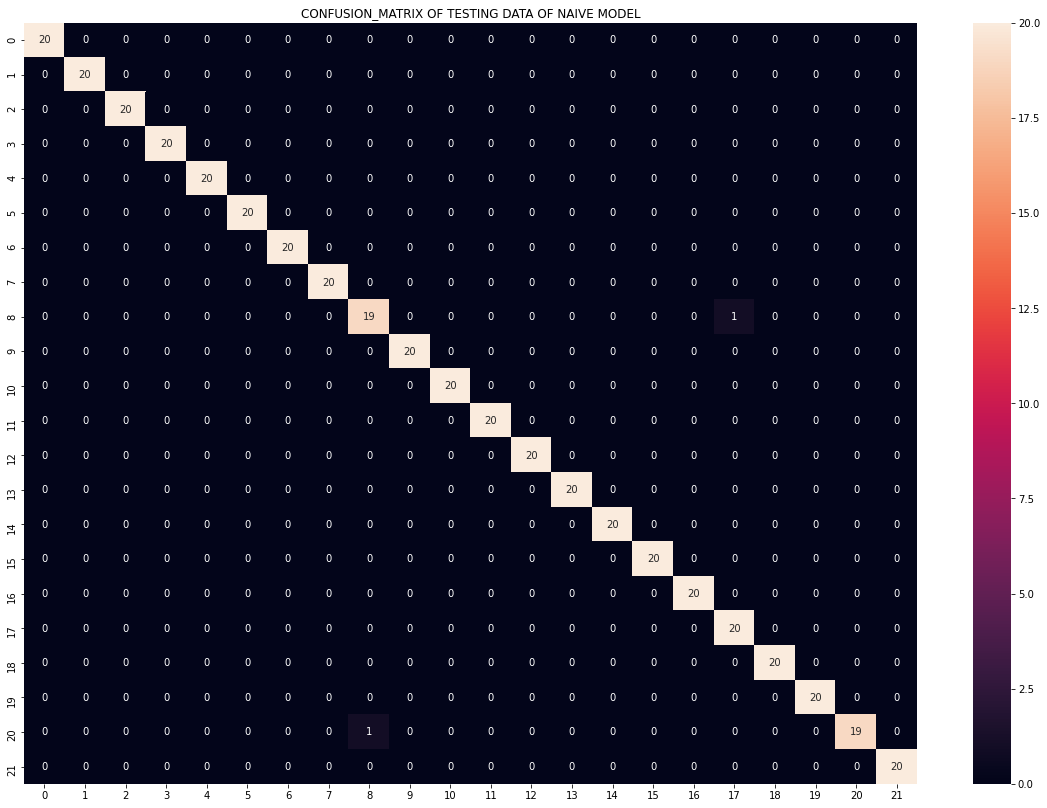

In [58]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF NAIVE MODEL")
sns.heatmap(cmnt,annot=True)

# DECISION TREE CLASSIFIER

In [94]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion="entropy")
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[]

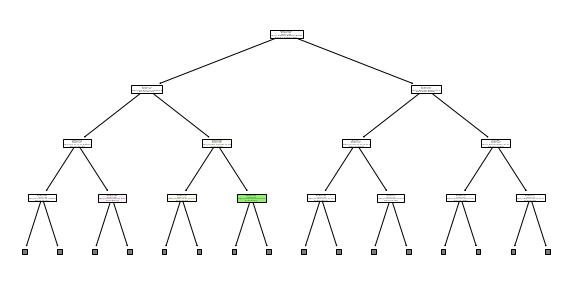

In [116]:
plt.figure(figsize=(10,5))
tree.plot_tree(tree_model,filled=True,feature_names=data.columns,max_depth=3)
plt.plot()

In [105]:
tree.export_text(tree_model)

'|--- feature_4 <= 0.16\n|   |--- feature_2 <= -0.45\n|   |   |--- feature_6 <= -0.52\n|   |   |   |--- feature_6 <= -0.80\n|   |   |   |   |--- feature_4 <= -0.52\n|   |   |   |   |   |--- class: mothbeans\n|   |   |   |   |--- feature_4 >  -0.52\n|   |   |   |   |   |--- feature_1 <= -0.10\n|   |   |   |   |   |   |--- class: mothbeans\n|   |   |   |   |   |--- feature_1 >  -0.10\n|   |   |   |   |   |   |--- feature_3 <= 0.87\n|   |   |   |   |   |   |   |--- class: lentil\n|   |   |   |   |   |   |--- feature_3 >  0.87\n|   |   |   |   |   |   |   |--- class: mothbeans\n|   |   |   |--- feature_6 >  -0.80\n|   |   |   |   |--- feature_0 <= 0.24\n|   |   |   |   |   |--- feature_4 <= -0.54\n|   |   |   |   |   |   |--- feature_4 <= -1.73\n|   |   |   |   |   |   |   |--- class: kidneybeans\n|   |   |   |   |   |   |--- feature_4 >  -1.73\n|   |   |   |   |   |   |   |--- class: mothbeans\n|   |   |   |   |   |--- feature_4 >  -0.54\n|   |   |   |   |   |   |--- feature_1 <= 0.00\n| 

In [84]:
traint_pred=tree_model.predict(x_train)
traint_pred

array(['muskmelon', 'cotton', 'mothbeans', ..., 'mango', 'mango',
       'orange'], dtype=object)

In [85]:
testt_pred=tree_model.predict(x_test)
testt_pred

array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'jute',
       'muskmelon', 'mango', 'maize', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'rice', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'lentil', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'rice', 'pigeonpeas', 'pigeonpeas',
       'watermelon', 'ma

In [86]:
tree_model_training_accuracy_score=accuracy_score(y_train,traint_pred)

cmt=confusion_matrix(y_train,traint_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,traint_pred))
print("classification_report:",classification_report(y_train,traint_pred))
print("confusion_matrix:",cmt)

TRAINING DATA SCORES
accuracy_score: 1.0
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       1.00      1.00      1.00        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       1.00      1.00      1.00        80
      cotton       1.00      1.00      1.00        80
      grapes       1.00      1.00      1.00        80
        jute       1.00      1.00      1.00        80
 kidneybeans       1.00      1.00      1.00        80
      lentil       1.00      1.00      1.00        80
       maize       1.00      1.00      1.00        80
       mango       1.00      1.00      1.00        80
   mothbeans       1.00      1.00      1.00        80
    mungbean       1.00      1.00      1.00        80
   muskmelon       1.00      1.00      1.00        80
      orange     

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF DTC MODEL'}>

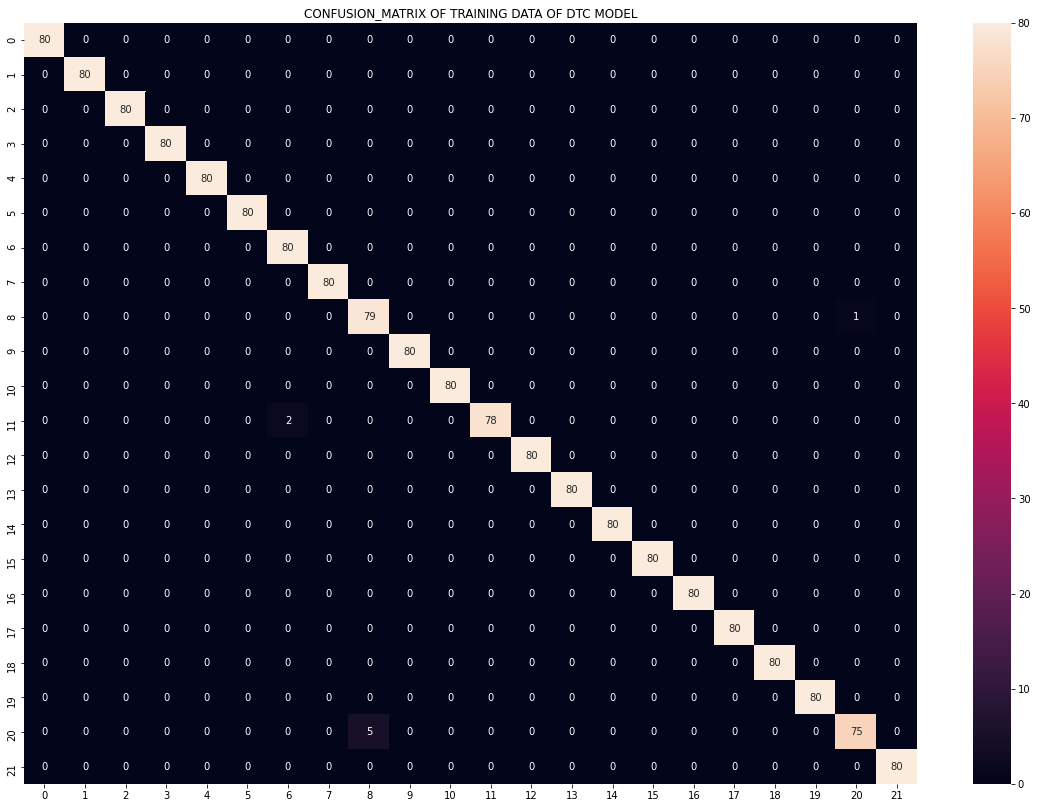

In [87]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF DTC MODEL")
sns.heatmap(cmn,annot=True)

In [88]:
tree_model_testing_accuracy_score=accuracy_score(y_test,testt_pred)
cmtt=confusion_matrix(y_test,testt_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",tree_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cmtt)

TESTING DATA SCORES
accuracy_score: 0.990909090909091
classification_report: <function classification_report at 0x000001A714678280>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF DCT MODEL'}>

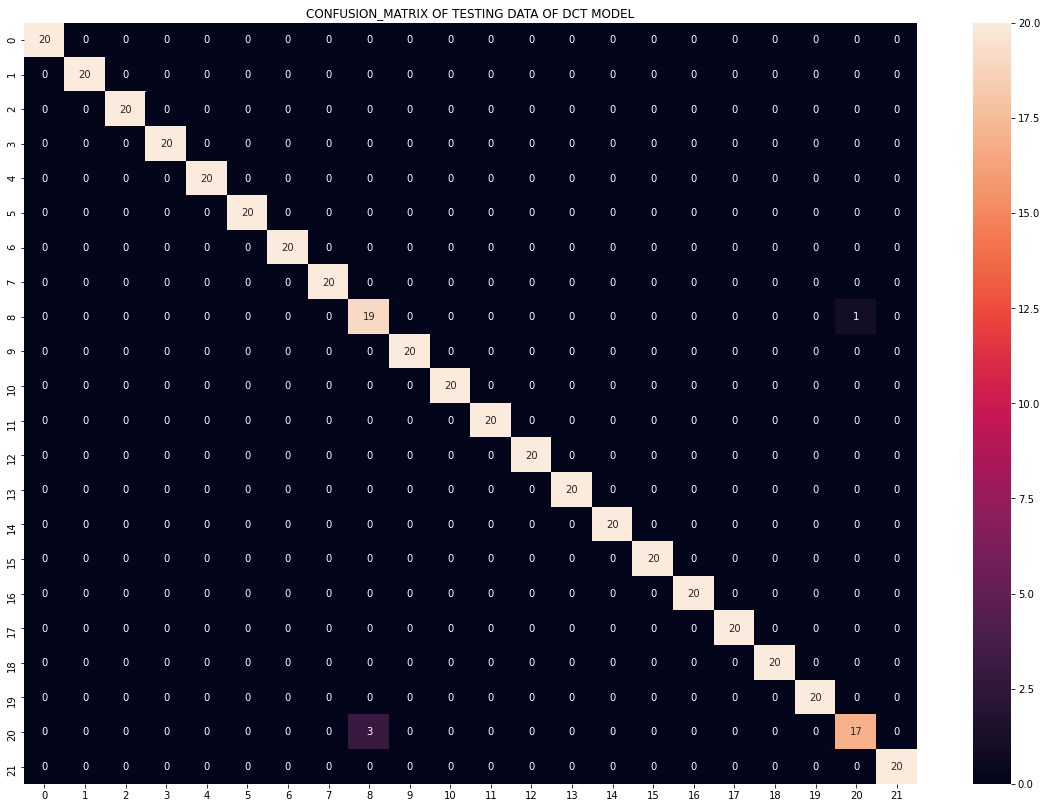

In [89]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF DCT MODEL")
sns.heatmap(cmtt,annot=True)

# STACKING MODEL

In [91]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
stack_model=StackingClassifier(estimators=[("m1",tree_model),("m2",naive_model),("m3",log_model)],final_estimator=RandomForestClassifier())

In [92]:
stack_model.fit(x_train,y_train)

C:\Users\Bhuma\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhuma\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

StackingClassifier(estimators=[('m1',
                                DecisionTreeClassifier(criterion='entropy')),
                               ('m2', GaussianNB()),
                               ('m3', LogisticRegression())],
                   final_estimator=RandomForestClassifier())

In [107]:
trains_pred=stack_model.predict(x_train)

In [108]:
tests_pred=stack_model.predict(x_test)

In [109]:
stack_model_training_accuracy_score=accuracy_score(y_train,trains_pred)

cms=confusion_matrix(y_train,trains_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,trains_pred))
print("classification_report:",classification_report(y_train,trains_pred))
print("confusion_matrix:",cms)

TRAINING DATA SCORES
accuracy_score: 1.0
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       1.00      1.00      1.00        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       1.00      1.00      1.00        80
      cotton       1.00      1.00      1.00        80
      grapes       1.00      1.00      1.00        80
        jute       1.00      1.00      1.00        80
 kidneybeans       1.00      1.00      1.00        80
      lentil       1.00      1.00      1.00        80
       maize       1.00      1.00      1.00        80
       mango       1.00      1.00      1.00        80
   mothbeans       1.00      1.00      1.00        80
    mungbean       1.00      1.00      1.00        80
   muskmelon       1.00      1.00      1.00        80
      orange     

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF STACKING  MODEL'}>

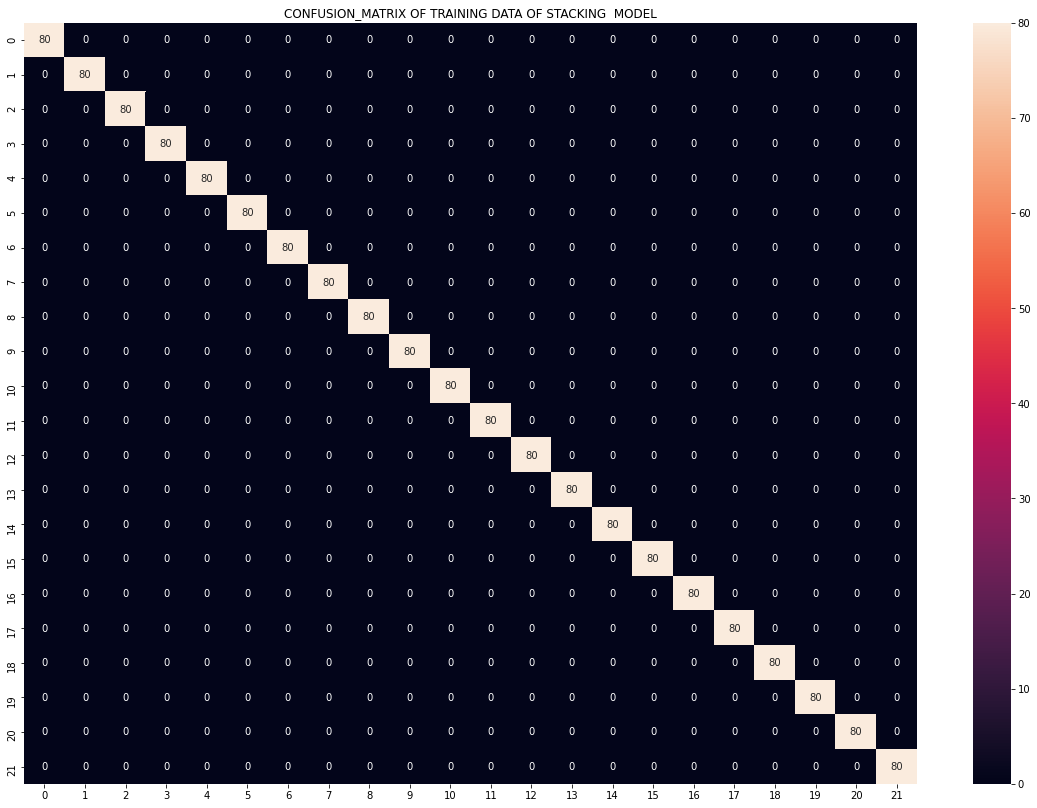

In [110]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF STACKING  MODEL")
sns.heatmap(cms,annot=True)

In [112]:
stack_model_testing_accuracy_score=accuracy_score(y_test,tests_pred)
cmst=confusion_matrix(y_test,tests_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",stack_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cmst)

TESTING DATA SCORES
accuracy_score: 0.9954545454545455
classification_report: <function classification_report at 0x000001A714678280>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF STACKING MODEL'}>

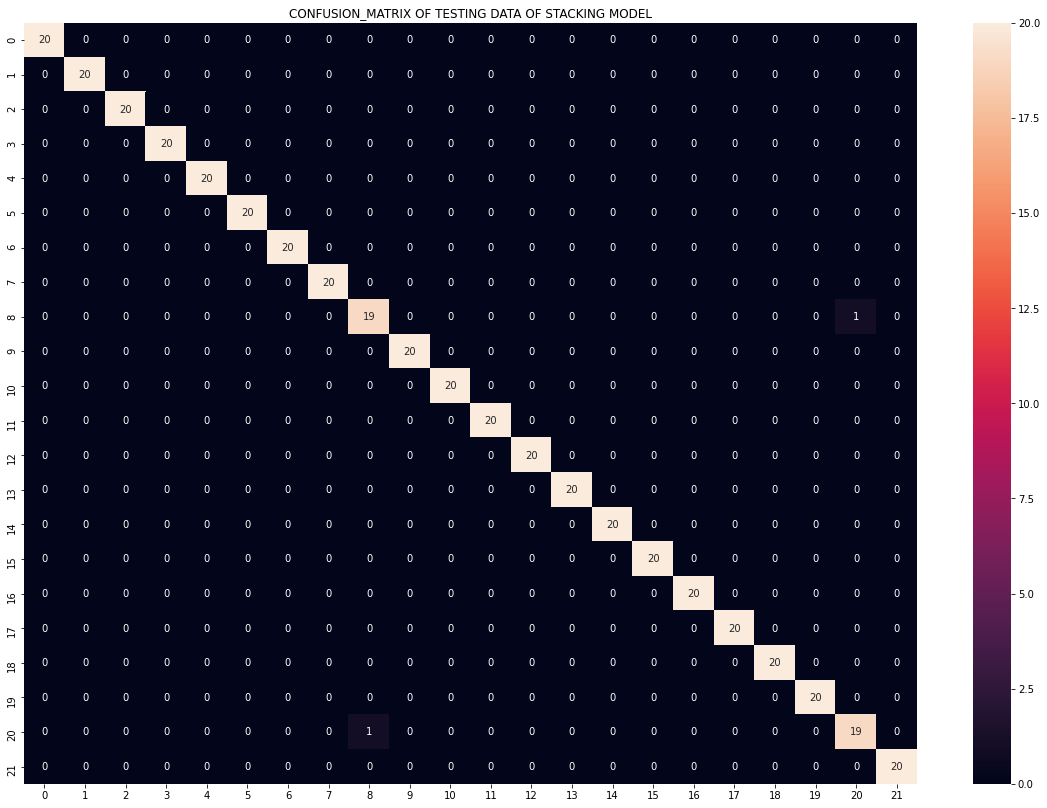

In [113]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF STACKING MODEL")
sns.heatmap(cmst,annot=True)

# MODELS ACCURACY SCORES

In [117]:
training_accuracy_scores=pd.DataFrame({"log":[log_model_training_accuracy_score],"knn":[knc_model_training_accuracy_score],"naive":[naive_model_training_accuracy_score],"DTC":[tree_model_training_accuracy_score],"Stacking":[stack_model_training_accuracy_score]})
training_accuracy_scores

,log,knn,naive,DTC,Stacking
0,0.976136,0.972727,0.995455,1.0,1.0


In [118]:
testing_accuracy_scores=pd.DataFrame({"log":[log_model_testing_accuracy_score],"knn":[knc_model_testing_accuracy_score],"naive":[naive_model_testing_accuracy_score],"DTC":[tree_model_testing_accuracy_score],"Stacking":[stack_model_testing_accuracy_score]})
testing_accuracy_scores

,log,knn,naive,DTC,Stacking
0,0.972727,0.968182,0.995455,0.990909,0.995455


In [120]:
df_accuracy_scores=pd.concat([training_accuracy_scores,testing_accuracy_scores])
df_accuracy_scores

,log,knn,naive,DTC,Stacking
0,0.976136,0.972727,0.995455,1.000000,1.000000
0,0.972727,0.968182,0.995455,0.990909,0.995455


In [123]:
df_accuracy_scores.set_index(pd.Index(["Training_scores","Testing_scores"]))

,log,knn,naive,DTC,Stacking
Training_scores,0.976136,0.972727,0.995455,1.000000,1.000000
Testing_scores,0.972727,0.968182,0.995455,0.990909,0.995455
